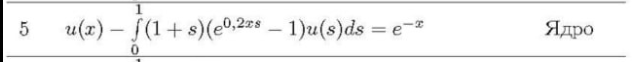

0.04904459202787581


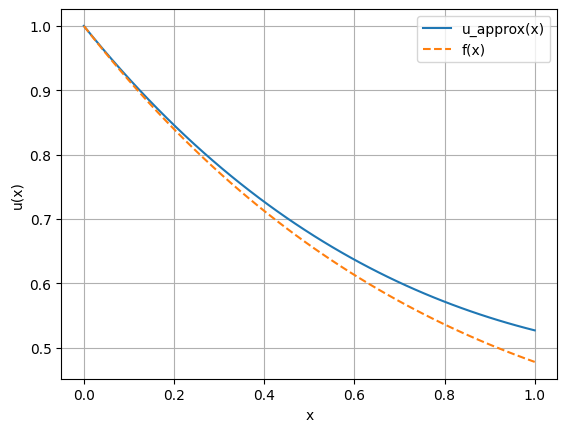

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import math



N = 20

def f(s):
    return np.exp(-s)

def a_n(x, n):
    return (0.8** (n+1)) / math.factorial(n + 1) * x ** (n + 1)


def b_n(s, n):
    return 0.8*s ** (n + 1) * (1 + s)


A = np.zeros((N, N))
F = np.zeros(N)

for m in range(N):
    for n in range(N):
        A[m, n], _ = quad(lambda s: b_n(s, m) * b_n(s, n), 0, 1)
    F[m], _ = quad(lambda s: b_n(s, m) * f(s), 0, 1)

# (I + A) * c = F
c = np.linalg.solve(np.eye(N) + A, F)


def u_approx(x):
    return np.exp(-x) + sum(a_n(x, n) * c[n] for n in range(N))



def K(x, s):
    return (1 + s) * (np.exp(0.2 * x * s) - 1)


def ux(x):
    integ, _ = quad(lambda s: K(x, s) * u_approx(s), 0, 1)
    return integ + np.exp(-x)



x_vals = np.linspace(0, 1, 50)

x1 =  [u_approx(x) for x in x_vals]
x2 =  [ux(x) for x in x_vals]

print(np.max(np.abs(np.array(x1) - np.array(x2))))
plt.plot(x_vals, [u_approx(x) for x in x_vals], label='u_approx(x)')
plt.plot(x_vals, [ux(x) for x in x_vals], '--', label='f(x)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()


0.0010414335445536093


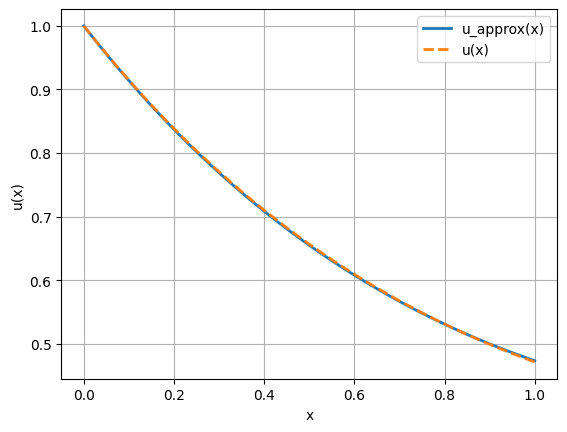

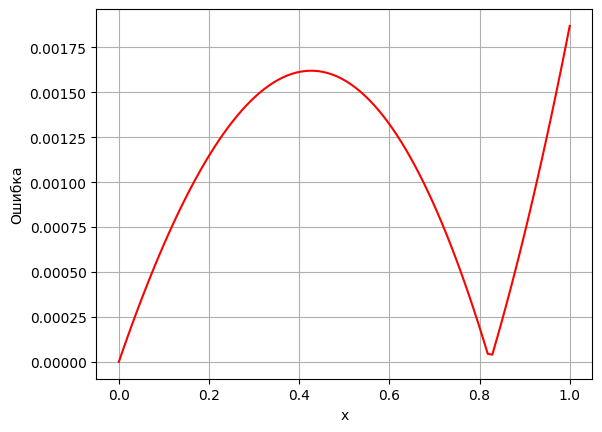

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import math


N = 8

def f(s):
    return np.exp(-s)

def a_k(x, k):
    return (0.6 ** k) / math.factorial(k) * x ** k

def b_k(s, k):
    return 0.6*s ** k * (1 + s)


A = np.zeros((N, N))
F = np.zeros(N)

for m in range(N):
    for n in range(N):
        A[m, n], _ = quad(lambda s: b_k(s, m + 1) * b_k(s, n + 1), 0, 1)
    F[m], _ = quad(lambda s: b_k(s, m + 1) * f(s), 0, 1)




c = np.linalg.solve(np.eye(N) + A, F)



def u_approx(x, c):
    return np.exp(-x) + sum(c[n] * a_k(x, n + 1) for n in range(N))



def K(x, s):
    return (1 + s) * (np.exp(0.2 * x * s) - 1)



def ux(x):
    integ, _ = quad(lambda s: K(x, s) * u_approx(s, c), 0, 1)
    return np.exp(-x) + integ


x_vals = np.linspace(0, 1, 100)
u_vals = [u_approx(x, c) for x in x_vals]
rhs_vals = [ux(x) for x in x_vals]
errors = np.abs(np.array(u_vals) - np.array(rhs_vals))


print(f"{np.mean(errors)}")


plt.plot(x_vals, u_vals, label='u_approx(x)', linewidth=2)
plt.plot(x_vals, rhs_vals, '--', label='u(x)', linewidth=2)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(x_vals, errors, color='red')
plt.xlabel('x')
plt.ylabel('Ошибка')
plt.grid(True)
plt.show()
